In [55]:
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
def load_image(path, gray=False):
    '''
        return RGB or gray image
    '''
    print(path, gray)
    if gray:
        
        return cv2.imread(path, 0)
    else:
        return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def write_image(path, image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return cv2.imwrite(path, image)
    
def show(x):
    plt.figure(figsize=(20, 20))
    plt.show(plt.imshow(x))

In [38]:
!ls data/1/*

data/1/IMG_9263_input.jpg   data/1/IMG_9263_output2.jpg
data/1/IMG_9263_output1.jpg


In [39]:
path_inputs = glob('data/*/*input.jpg')
path_1_outputs = glob('data/*/*output1.jpg')
path_2_outputs = glob('data/*/*output2.jpg')

In [40]:
!mkdir data/train

mkdir: data/train: File exists


In [56]:
i = 0
for p1, p2, p3 in zip(path_inputs, path_1_outputs, path_2_outputs):
    im1 = load_image(p1)    
    im2 = load_image(p2, gray=True)
    im3 = load_image(p3, gray=True)
    im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
    
    input = im1
    output = np.stack([im1_gray, im2, im3], axis=-1)
    train_img = np.concatenate([input, output], axis=1)
#     show(train_img)
    write_image('data/train/{}.png'.format(i), train_img)
    i+=1

data/1/IMG_9263_input.jpg False
data/1/IMG_9263_output1.jpg True
data/1/IMG_9263_output2.jpg True


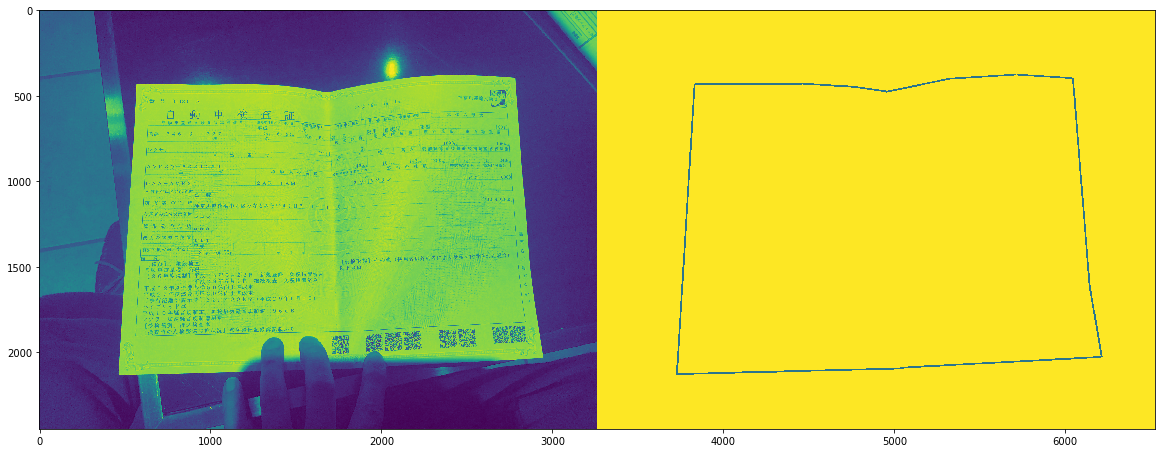

In [52]:
show(train_img[:,:,2])

In [45]:
im2.mean()

247.24841494757626